# Chapter 8: Dimensionality Reduction

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

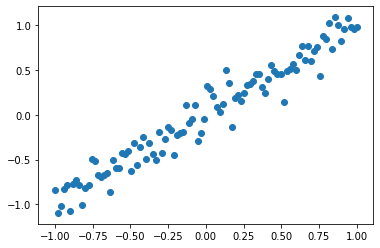

In [36]:
X = np.linspace(start=-1., stop=1., num=100)
y = X + np.random.normal(size=100)/7.
plt.scatter(X,y)

In [37]:
X = np.concatenate((X[..., None], y[..., None]), axis=1)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(a=X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c1, c2

(array([0.70228027, 0.71190057]), array([-0.71190057,  0.70228027]))

In [39]:
from sklearn.decomposition import PCA

In [40]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.98696402, 0.01303598]), 1.0)

In [41]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [42]:
d = np.argmax(cumsum >= .95) + 1

In [43]:
d

1

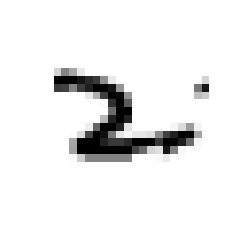

In [44]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
plt.imshow(X_train[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

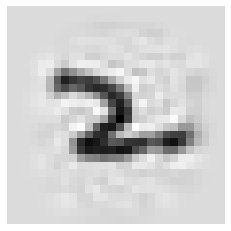

In [45]:
plt.imshow(X_recovered[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

In [46]:
# randomizado

rnd_pca = PCA(n_components=154, svd_solver='randomized')

X_reduced = rnd_pca.fit_transform(X_train)



In [48]:
# incremental minibacth for large dataset in memory

from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

In [50]:
# kernel pca

X, y = datasets.make_swiss_roll(n_samples=1000, noise=1)


from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04, n_jobs=-1)

X_reduced = rbf_pca.fit_transform(X)


# demais parte nao foi feita, pois trava o computador

(1000, 2)

In [52]:
# LLE

from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

# Exercises

### What are the main motivations for reducing a Dataset's dimensionality? What are the main Drawbacks?

Motivations:

- Visualization
- Reduce noisy features and improve the performance of the model
- Data compression
- Reduce model time

Drawbacks:

- Information Lost;
- Difficult to interpret transformed features;

### What is the curse of dimensionality?

In a high dimensional space, the instances tend to be on the edges of the space, increasing the distances between them, leading to training problems because requires more data to learn and more computational time.

### Once a Dataset's dimensionality has been reduced, is it possible to reverse the operation? If so, how? If not, why?

Yes, In the case of PCA, but not perfectly.  

### Can PCA be used to reduce the dimensionality of a highly non-linear dataset?

Yes, but it's not recommendable. PCA would lose too much information.

### Suppose you perform PCA on a 1,000-dimensional dataset, setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

We can't awnser exactly. This will depend on data.
    
### In What cases would you use vanilla PCA, Incremental PCA, Randomized PCA, or Kernel PCA?

Vanilla PCA for static data analysis where we want to perform a one-time dimensionality reduction for the purposes of data analysis.

incremental PCA when we have a large dataset that can't be fit into memory at once. 

Randomized PCA when speed and performance are important, for its faster search algorithm.

Kernel PCA if we know that the high-dimensional instances form clusters and we want to preserve that after projection.

### How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

Measuring the reconstruction loss. When the trained algorithms don't offer a reconstruction mechanism, we can simply evaluate their performance by comparing the end metric while freezing the subsequent steps in the pipeline, for example if we're doing dimensionality reduction then classification, we would fix the algorithm/hyperparameters of the ML step and vary the dimensionality reduction algorithm and take the classification accuracy as a metric to evaluate different dimensionality reduction algorithms.

### Does it make any sense to chain two different dimensionality reduction algorithms?

Yes, it does sometimes. Example: Algorithm B is better then A but much slower, so we use A to get rid of most useless features then B to maximize performance.

### Load the MNIST dataset & split it into train/test sets


In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
%timeit -n1 -r1 forest.fit(X_train[:5000], y_train[:5000])
from sklearn.metrics import accuracy_score
accuracy_score(y_test, forest.predict(X_test))

2.14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


0.931

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train[:5000])
X_train_ = pca.transform(X_train[:5000])
X_test_ = pca.transform(X_test[:5000])
%timeit -n1 -r1 forest.fit(X_train_[:5000], y_train[:5000])

4.42 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
accuracy_score(y_test, forest.predict(X_test_))

0.903

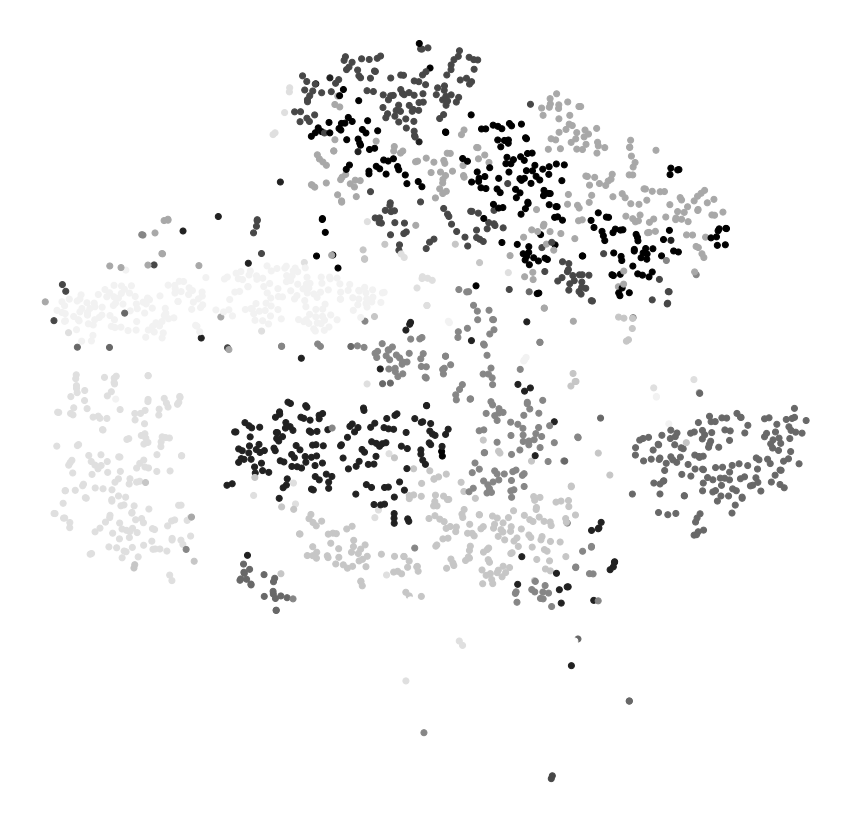

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE()
X_train_ = tsne.fit_transform(X_train[:2000])
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(X_train_[:, 0], X_train_[:, 1], c=y_train[:2000].astype(int), cmap='Greys')
plt.axis('off')
plt.show()

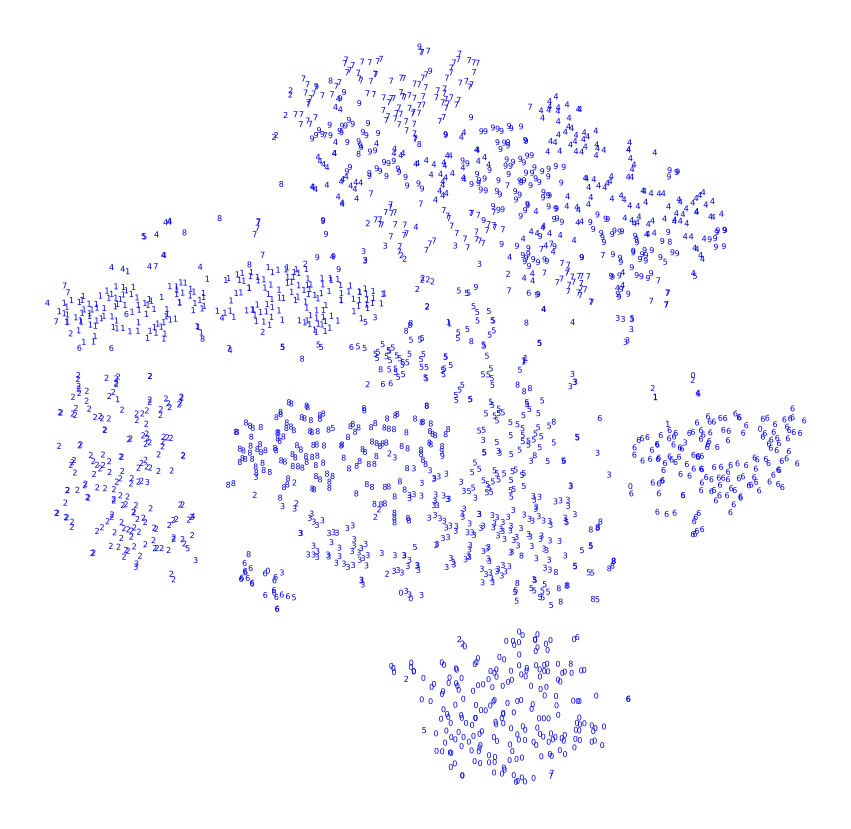

In [12]:
plt.figure(figsize=(15, 15))
labels = y_train[:2000].astype(int)
for idx in range(len(X_train_)):
    plt.scatter(X_train_[idx,0], X_train_[idx,1], marker=f'$ {labels[idx]} $', c='blue', edgecolors='none')
    
plt.axis('off')
plt.show()